## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


Для начала импортируем библиотеки **pandas**, **matplotlib**, **seaborn** и прочитаем файлы с данными:  
    **/datasets/mkrf_movies.csv** — данные о прокатных удостоверениях  
    **/datasets/mkrf_shows.csv** — данные о прокате в российских кинотеатрах

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# прочитаем данные таблиц
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

# выведим таблицу mkrf_movies
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [2]:
# выведим таблицу mkrf_shows
mkrf_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [3]:
# посмотрим общую информацию
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [4]:
# посмотрим общую информацию
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объеденим данные двух столбцов.  
Перед объединением таблиц, изменим тип столбца `puNumber` в таблице данных ***mkrf_shows*** на <span style="color:orange">*object*</span>

In [5]:
# puNumber 111004112
display(mkrf_movies[mkrf_movies['puNumber'].str.contains(' ', na=False)])

mkrf_shows[mkrf_shows['puNumber'] == 111004112]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN


,puNumber,box_office


In [6]:
# заменим тип данных
mkrf_shows['puNumber'] = mkrf_shows['puNumber'].astype('str')
# объединим таблицы и отобразим информацию
movies = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


#### Вывод

Таблица ***mkrf_movies*** содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.  
Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица ***mkrf_shows*** содержит сведения о показах фильмов в российских кинотеатрах.
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

Объеденим два файла в ***mkrf_movies***. Файл содержит данные по 7486 фильмам из которых описывается по 16 столбцам. Есть пропущеные значения, нужно проверить и принеобходимости отработать. Так же есть дата, которая в формате <span style="color:orange">*object*</span> заменим на <span style="color:orange">*date*</span>


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Для дальнешего анализа потребуется чтобы в стобце `show_start_date` — дата премьеры фильма были данные в формате <span style="color:orange">*date*</span>

In [7]:
# заменим тип данныхи отобразим информацию
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'],format='%Y.%m.%dT%H:%M:%S')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), object(11)
memory usage: 994.2+ KB


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Не заполненные данные есть в столбцах:
`production_country` - страна-производитель;
`director` - режиссёр;
`producer` - продюсер;
`refundable_support` - объём возвратных средств государственной поддержки;
`nonrefundable_support` - объём невозвратных средств государственной поддержки;
`budget` - общий бюджет фильма;
`financing_source` - источник государственного финансирования;
`ratings` - рейтинг фильма на КиноПоиске;
`genres` - жанр фильма;
`box_office` - сборы в рублях.

Как вариант заполнить пустые значения заглушкой. Но это никак не повлияет на данные. Пропуски оставим, самостоятельно заполнить мы не можем. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [8]:
# кол-во явных дублей
movies.duplicated().sum()

0

Явных дублей в файле нет. Проверим по названию фильма и по номеру прокатного удостоверения

In [9]:
# посмотрим униакльные значения и их кол-во по названию фильма
movies['title'].value_counts().head()

День святого Валентина_            5
Лузеры                             4
Шерлок Холмс                       4
Знакомство с Факерами 2.           4
Жена путешественника во времени    4
Name: title, dtype: int64

In [10]:
# посмотрим самую верхнюю строку
movies[movies['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Из самой таблицы не понятно, одинаковые названия но номера разные. Посетив сайт Министерство культуры Российской Федерации, становится ясно, различия в фильмах связаны с разными правами на использование фильма

Проверим есть ли дубликаты по номеру прокатного удостоверения

In [11]:
# посмотрим униакльные значения и их кол-во по номеру
movies['puNumber'].value_counts().head()

221154310    2
221054410    2
111003416    1
111010410    1
114002915    1
Name: puNumber, dtype: int64

Поторений не много, напечатаем их.

In [12]:
# посмотрим по номеру 221054410
movies[movies['puNumber'] == '221054410']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [13]:
# посмотрим по номеру 221154310
movies[movies['puNumber'] == '221154310']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


Просмотрев повторяющиеся, по названию видно, что фильмы разные. Это не дубликаты. Возможно МКРФ выдал один номер на два фильма.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.


Проверим столбцы с категориальными значениями.

In [14]:
# уникальные значения по столбцу type
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Есть несколько значений, у которых есть пробел в начале строки. Заменим данные, на данные без пробелов.

In [15]:
# уберем пробел из данных
movies['type'] = movies['type'].str.strip()
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [16]:
# уникальные значения по столбцу age_restriction
movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

По столбцу `age_restriction` — возрастная категория все верно. Править тут ничего не надо. Для дальнешего анализа упростим, создадим столбец с данными на 18+, 16+, 12+, 6+ и 0+.

In [17]:
# функция категоризации 
def age_restriction_group(row):
    if row == '«18+» - запрещено для детей':
        return '18+'
    if row == '«16+» - для детей старше 16 лет':
        return '16+'
    if row == '«12+» - для детей старше 12 лет':
        return '12+'
    if row == '«6+» - для детей старше 6 лет':
        return '6+'
    return '0+'

In [18]:
# зальем датсет через apply и функцию
movies['age_group'] = movies['age_restriction'].apply(age_restriction_group)
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+


Проверим дагные по столбцу `ratings` - рейтинг фильма на КиноПоиске

In [19]:
# уникальные значения по столбцу ratings
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видно, что рейтинг заполнен по разному, есть процетная оценка.
Поскольку часть значений содержится в виде процентов, переведем такие значения к общему виду для рейтинга и приведем столбец к типу <span style="color:orange">*float64*</span>

In [20]:
# функция для замены %
def remove_percent(rating):
# print
    if str(rating).endswith('%'):
        return float(rating[:-1])/10
    else:
        return rating

# зальем датсет через apply и функцию
# заменим тип данных и отобразим информацию
movies['ratings'] = movies['ratings'].apply(remove_percent)
movies['ratings'] = movies['ratings'].astype('float64')
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Видно, что данные с процентами не относятся к кинопоиску, т.к. на кинопоиске 10 бальная система оценки. Нужно уточнить откуда эти данные, после принять решение удалять их или нет. Сейчас оставим их.

Скоректировали данные и привели к одному виду по столбцу `type` — тип фильма и `ratings` - рейтинг фильма на КиноПоиске

#### Шаг 2.5. Проверьте количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


Так как столбец `budget` — общий бюджет фильма уже включает в себя полный объём государственной поддержки, он не может быть меньше чем сумма столбцов `refundable_support` — объём возвратных средств государственной поддержки и `nonrefundable_support` — объём невозвратных средств государственной поддержки.

In [21]:
# отобразим список фильмов у которых бюджет меньше чем государственная поддержка
movies.query('budget == 0 & (refundable_support != 0 | nonrefundable_support != 0)')['title'].unique()

array(['14+', 'Дуxless 2', 'Воин (2015)', 'Бармен.',
       'Савва. Сердце воина', 'Тряпичный союз', 'Срочно выйду замуж',
       'Помню - не помню!', 'Любовь с ограничениями', 'Притяжение (2016)',
       'Чудо-юдо', 'Мифы', 'Селфи', 'Два хвоста', 'Принцесса и дракон',
       'Баба Яга', 'Большое путешествие'], dtype=object)

In [22]:
# добавим столбец для расчета, сумма столбцов refundable_support и nonrefundable_support
movies['sum_ref_noref'] = movies['refundable_support'] + movies['nonrefundable_support']
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,sum_ref_noref
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN


In [23]:
# расчитаем процент строк с неверно заполненым бюджетом
n = 0
for index in range(len(movies['budget'])):
    m = movies['budget'][index] - movies['sum_ref_noref'][index]
    if m < 0:
        n += 1
n / len(movies[movies['budget'].isnull() == False])
print('Неверных строк {:.1%}'.format(n / len(movies[movies['budget'].isnull() == False])))

Неверных строк 5.1%


Строк очень мало, 5 процентов, от всех заполненных строк по столбцу бюджет. Можно удалить иили отметить заглушкой

In [24]:
# посмотрим какие строки дают ошибку
n = []
for index in range(len(movies['budget'])):
    m = movies['budget'][index] - movies['sum_ref_noref'][index]
    if m < 0:
        n.append(index)
n

[2053,
 2058,
 2472,
 2532,
 2615,
 2684,
 2788,
 2874,
 3047,
 3565,
 3675,
 3739,
 5673,
 5806,
 6008,
 6323,
 6823]

In [25]:
movies[movies['budget'].notna()][((movies[movies['budget'].notna()]['budget'] - movies[movies['budget'].notna()]['sum_ref_noref']) < 0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,sum_ref_noref
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,16+,23000000.0
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,16+,75000000.0
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,12+,80000000.0
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,16+,20000000.0
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,6+,160000000.0
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,18+,59000000.0
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,16+,35000000.0
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,12+,6000000.0
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,16+,70000000.0
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,12+,250000000.0


Некорректные данные, это данные с нулевым бюджетом.

Создадим столбец, чтобы для дальнейшего анализа легко можно было убрать такие строки.

In [26]:
# Функция категоризации 
def budget_empty(row):
    if row > 0:
        return 1
    return 0

# заливка дата сета через apply и функцию
movies['budget_empty'] = movies['budget'].apply(budget_empty) 

Добавили новый столбец в котором 1 это бюджет заполнен верно, 0 - бюджет не заполнен либо данные не корректны. Предложение добавить проверку, если бюджет минус объём возвратных средств государственной поддержки минус объём невозвратных средств государственной поддержки равен отрицательному значению, выдавать в ошибку.

#### Шаг 2.6. Добавьте новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [27]:
# вытяним из столбца show_start_date данные по номеру года
movies['year_name'] = movies['show_start_date'].dt.year
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,sum_ref_noref,budget_empty,year_name
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,NaN,0,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,6+,NaN,0,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [28]:
# функция вытаскивает из текста первое значение до запятой
def get_first_value(string, sep = ','):
    """
    Функция возвращает первый элемента из строки разделенной с помощью sep
    """
    value_list = string.split(sep=sep)
    return value_list[0]

In [29]:
# Добавим столбцы
movies['basic_director'] = movies[movies['director'].isnull() == False]['director'].apply(get_first_value)
movies['basic_genres'] = movies[movies['genres'].isnull() == False]['genres'].apply(get_first_value)

In [30]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,age_group,sum_ref_noref,budget_empty,year_name,basic_director,basic_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,7.2,"боевик,драма,мелодрама",NaN,18+,NaN,0,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,6.6,"драма,военный",NaN,6+,NaN,0,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",NaN,18+,NaN,0,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [31]:
# добавили расчет с долей от общего бюджета
movies['share_of_total_budget'] = round(movies['sum_ref_noref'] / movies['budget'], 2)

In [32]:
# посмотрим какой фильм получил больше 70 процентов поддержки от государства
movies[movies['budget_empty'] == 1].query('share_of_total_budget > 0.70')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,age_group,sum_ref_noref,budget_empty,year_name,basic_director,basic_genres,share_of_total_budget
3385,О любви (2017),111018816,2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,...,NaN,NaN,11332412.0,16+,55000000.0,1,2016,В.Бортко,NaN,0.78


Фильм который больше всех получил господдержку "О любви", от В.Бортко. 78% от общего бюджета.

#### Вывод

Заменили тип данных по столбцам `show_start_date` — дата премьеры фильма, `ratings` — рейтинг фильма на КиноПоиске.  
Проверили файлы на дубли, явных повторяющихся строк нет. Поворения по столбцам `title` — название фильма и `puNumber` — номер прокатного удостоверения обоснованы, оставляем, на анализ они не повлияют.  
Пустые значения оставили пустыми, они не потребуются для анализа. Да, и заполнить самостоятельно нет возможности.  
Созданы столбцы для `age_group` — краткое обозначение возрастной категории, `sum_ref_noref` — сумма объём средств государственной поддержки, `budget_empty` — столбец обозначение заполненого бюджета, `year_name` — год премьеры фильма, `basic_director` — главный режисер, `basic_genres` — главный жанр, `share_of_total_budge` — доля государственной поддержки от общего бюджета фильма.  
Скорректированны данные в столбцах `type` — тип фильма и найдена ошибка в заполнении бюджета. Ошибка в бюджете добавлена в под категорию 0, и учитываться в анализе не будет.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [33]:
# создадим отдельный датасет по фильмам выходивших в прокат
box_office_movies = movies[movies['box_office'].isnull() == False]

In [34]:
# создадим сводную таблицу
box_office_movies_pt = box_office_movies.pivot_table(index='year_name', values='title', aggfunc='count')
movies_pt = movies.pivot_table(index='year_name', values='title', aggfunc='count')
share = box_office_movies_pt.merge(movies_pt, on='year_name', how='left')
share['share'] = round(share['title_x'] / share['title_y'], 2)
share

,title_x,title_y,share
year_name,,,
2010,105,985,0.11
2011,109,622,0.18
2012,128,593,0.22
2013,184,630,0.29
2014,279,807,0.35
2015,465,705,0.66
2016,526,818,0.64
2017,357,505,0.71
2018,475,891,0.53


Доля, по данной таблице, видно что выросла. С 2010 года росла до 2017 год. Но в 2018 году снизилась на 18%, далее снова виден рост.

Заметен рост количества фильмов выходивших в прокат до 2016 года. В 2017 году почти на 169 фильмов стало меньше, но после количество стало снова рости.

In [35]:
# высчитаем долю фильмов выходивших в прокат от всех фильмов
len(box_office_movies['title']) / len(movies['title'])
print('Фильмы с указанной информацией о прокате в кинотеатрах {:.1%}'.format(len(box_office_movies['title']) / len(movies['title'])))

Фильмы с указанной информацией о прокате в кинотеатрах 42.2%


42.2% фильмов вышло в прокат

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

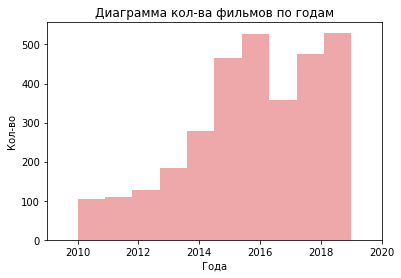

In [36]:
# построим диаграмму
sns.distplot(box_office_movies['year_name'], kde=False, bins=10, color='tab:red')
plt.xlim(2009, 2020)
plt.title('Диаграмма кол-ва фильмов по годам')
plt.xlabel('Года')
plt.ylabel('Кол-во')
plt.show()

Минимальные сборы были в с 2010 по 2013 года. Большие показатели расперделились на 2017-2019 года

In [37]:
# сводная таблица по сборам в зависимости от года
box_office_movies.pivot_table(index='year_name', values='box_office', aggfunc='sum').sort_values('box_office', ascending=False)

,box_office
year_name,
2018,4.966840e+10
2017,4.856371e+10
2019,4.842571e+10
2016,4.786630e+10
2015,3.949737e+10
2014,7.444952e+09
2013,2.979971e+07
2011,1.410276e+07
2012,6.955423e+06


- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [38]:
# создадим сводную таблицу
box_office_movies.pivot_table(index='year_name', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year_name,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

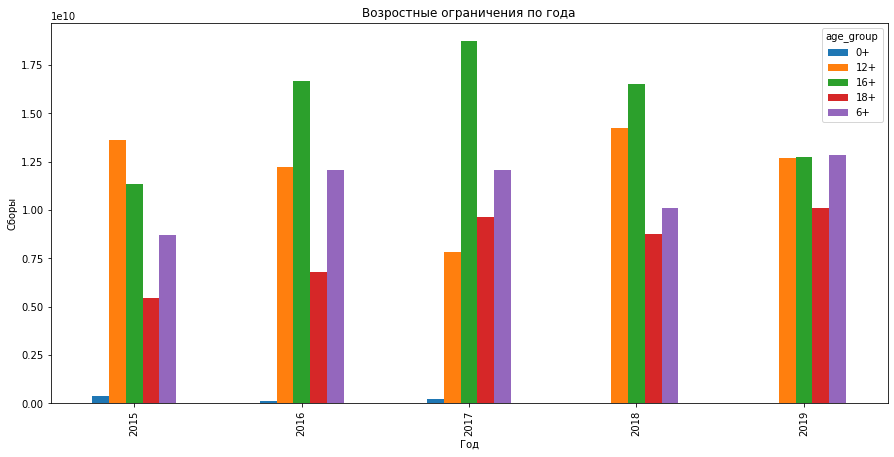

In [39]:
# Построим диаграмму
(box_office_movies
    .query('year_name > 2014')
    .pivot_table(index = 'year_name',
                  columns = 'age_group',
                  values = 'box_office',
                  aggfunc = 'sum')
    .plot(kind = 'bar', figsize = (15,7))
)
plt.title('Возростные ограничения по года')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

Фильмы 0+ неинтересные, поэтому никто не ходит
18+ не все могут пройти на такие фильмы, поэтому сборы не такие большие
6+ хорошие сборы, в основном это семейные фильмы и мультфильмы, поэтому в основном идут взрослые с детьми, поэтому сборы хорошие
12+ и 16+ охватывают достаточно большую аудиторию за счёт небольшого возрастного ограничения, а так же сборы выше за счёт сюжета, которому поставили такой рейтинг
16+ повыше, потому что туда входит больше платежеспособной аудитории, чем в 12+

#### Вывод

С каждым годом количество фильмов растет. Хотя не все выходят в прокат, только 42,2% от всех фильмов.  
Заметно что растут сборы, в 2014 году был резкий скачек.  
В основном людям нравятся фильмы 12+ и 16+ у них больше всего сборов.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

- Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [40]:
# создадим отдельный датасет по фильмам получившие государственную поддержку
# очистим данные от пропущенных значений
financing_source_movies = movies.query('budget_empty == 1 & sum_ref_noref > 0')

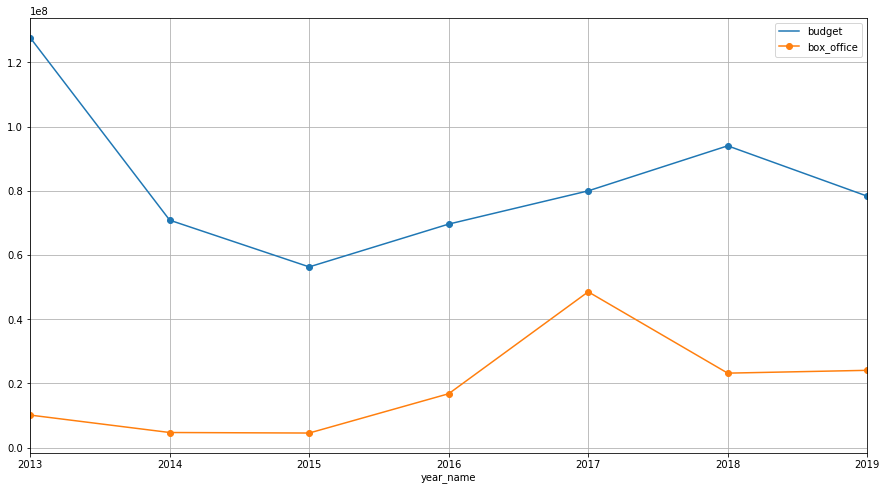

In [41]:
# постороим график где сравним бюджет фильм и его господдержку
(financing_source_movies
     .sort_values(by='refundable_support',ascending=True)
     .groupby('year_name')['budget'].median()
     .plot(x='year_name',y='budget',style='o-',grid=True,figsize=(15,8),legend=True)
)

(financing_source_movies
     .groupby('year_name')['box_office'].median()
     .plot(x='year_name',y='box_office',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.show()

По графику видно что по годам фильмы с господдержкой не окупились

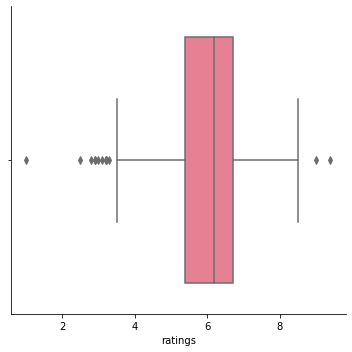

In [42]:
# построим диаграмму размаха
sns.catplot(x='ratings', kind='box', data=financing_source_movies, palette='husl')
plt.show()

Рейтинг по таким фильмам не большой, основная масса фильмов с оценкой меньше 6. Посмотрим какие фильмы окупились

In [43]:
the_film_paid_off = financing_source_movies.query('box_office - budget > 0')

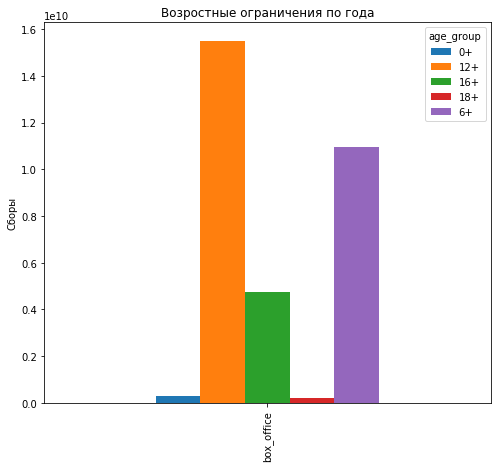

In [44]:
# Построим диаграмму
(the_film_paid_off
    .pivot_table(columns = 'age_group',
                  values = 'box_office',
                  aggfunc = 'sum')
    .plot(kind = 'bar', figsize = (8,7))
)
plt.title('Возростные ограничения по года')
plt.ylabel('Сборы')
plt.show()

Фильмы с огрничением 12+ и 6+ беспорно фавориты.

In [45]:
# посмотрим список жанров
the_film_paid_off['genres'].value_counts().head()

комедия                            15
комедия,мелодрама                   5
мультфильм,приключения,семейный     4
драма                               4
драма,мелодрама                     2
Name: genres, dtype: int64

In [46]:
# посмотрим список типов
the_film_paid_off['type'].value_counts()

Художественный    58
Анимационный       8
Name: type, dtype: int64

По данным видно что лучше окупаются фильмы жанра комедии

In [47]:
# посмотрим список жанров не окупившихся фильмов
# создадим таблицу
the_film_was_stagnant = financing_source_movies.query('box_office - budget < 0')

In [48]:
the_film_was_stagnant['genres'].value_counts().head()

драма                40
комедия              15
комедия,мелодрама     9
драма,мелодрама       5
мультфильм            4
Name: genres, dtype: int64

Выходит драма на любителя, мало кто любит грустить.

#### Вывод

Данные показали, что в основном фильмы с поддежкой государства не окупились. Да, и оценка у них не большая. Людям больше нравятся семейные комедии с ограничением 12+ и 6+.

### Шаг 5. Напишите общий вывод

Отвечая на вопрос "насколько такие фильмы,которые получили государственную поддержку, интересны зрителю".  
Да интерес есть, хорошие сборы, в основном это семейные комедии, поэтому в основном идут взрослые с детьми, поэтому сборы хорошие 12+ и 16+ охватывают достаточно большую аудиторию за счёт небольшого возрастного ограничения, а так же сборы выше за счёт сюжета, которому поставили такой рейтинг 16+ повыше, потому что туда входит больше платежеспособной аудитории, чем в 12+.  Не окупившимися оказались в основном драмы и мелодрамы.

По технической части хотелось бы чтобы рейтинг, если написано кинопоиск, был дейстивтельно оттуда. У даных в столбце бюджет была бы проверка, что не может быть меньше данных господдержки.